# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = 'imperial'
query = (f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q=')


response = requests.get(query).json()
response


{'cod': '400', 'message': 'Nothing to geocode'}

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities


['kailua',
 'half moon bay',
 'norman wells',
 'isiro',
 'igrim',
 'illoqqortoormiut',
 'port elizabeth',
 'tiksi',
 'pachuca',
 'povrly',
 'punta arenas',
 'saint anthony',
 'khatanga',
 'prudentopolis',
 'bluff',
 'indianola',
 'ushuaia',
 'hasaki',
 'taolanaro',
 'arrecife',
 'changji',
 'belmonte',
 'longyearbyen',
 'saleaula',
 'vaitupu',
 'hilo',
 'kruisfontein',
 'busselton',
 'muri',
 'sorland',
 'tawang',
 'hermanus',
 'pisco',
 'mataura',
 'khulna',
 'oktyabrskiy',
 'muli',
 'nouakchott',
 'mys shmidta',
 'mangrol',
 'sanming',
 'susuman',
 'saldanha',
 'chokurdakh',
 'ostrovnoy',
 'atuona',
 'la romana',
 'clyde river',
 'leningradskiy',
 'saint george',
 'tasiilaq',
 'staryy nadym',
 'elat',
 'bredasdorp',
 'mar del plata',
 'hithadhoo',
 'hobart',
 'east london',
 'lasa',
 'vaini',
 'yaan',
 'nanakuli',
 'saint-philippe',
 'arraial do cabo',
 'iqaluit',
 'sorong',
 'katsuura',
 'belyy yar',
 'bengkulu',
 'lyngseidet',
 'caravelas',
 'nikolskoye',
 'rikitea',
 'vila franca 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:
city2 = []
lngs = []
lats = []
clouds = []
date = []
humid = []
max_temp = []
wind_speed = []
country = []

count = 1
oneadd = 1

for city in cities:
    try:
        query_url = query + city
        response2 = requests.get(query_url).json()
        clouds.append(response2['clouds']['all'])
        lats.append(response2['coord']['lat'])
        lngs.append(response2['coord']['lon'])
        date.append(response2['dt'])
        humid.append(response2['main']['humidity'])
        max_temp.append(response2['main']['temp_max'])
        wind_speed.append(response2['wind']['speed'])
        country.append(response2['sys']['country'])
    
        if count < 49:
            count += 1
            city2.append(city)
        else:
            count = 1
            oneadd += 1
            city2.append(city)
            #if oneadd > 9: #tests if/else
                #print(f'{lngs}{lats}{clouds}')
                #break
                #break
        print(f'Processing Record {count} of Set {oneadd} | {city}')
    except Exception:
        print('City not found. Skipping...')
        
print('--------------------Data Retrieval Complete--------------------')

Processing Record 2 of Set 1 | kailua
Processing Record 3 of Set 1 | half moon bay
Processing Record 4 of Set 1 | norman wells
Processing Record 5 of Set 1 | isiro
Processing Record 6 of Set 1 | igrim
City not found. Skipping...
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | pachuca
Processing Record 10 of Set 1 | povrly
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | prudentopolis
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | indianola
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hasaki
City not found. Skipping...
Processing Record 19 of Set 1 | arrecife
Processing Record 20 of Set 1 | changji
Processing Record 21 of Set 1 | belmonte
Processing Record 22 of Set 1 | longyearbyen
City not found. Skipping...
City not found. Skipping...
Processing Record 23 o

Processing Record 45 of Set 4 | yulara
Processing Record 46 of Set 4 | khandbari
Processing Record 47 of Set 4 | tamale
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | orlik
City not found. Skipping...
Processing Record 1 of Set 5 | chifeng
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | nyurba
Processing Record 4 of Set 5 | narsaq
Processing Record 5 of Set 5 | sola
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | lander
Processing Record 8 of Set 5 | ngunguru
Processing Record 9 of Set 5 | pevek
City not found. Skipping...
Processing Record 10 of Set 5 | nanyamba
Processing Record 11 of Set 5 | krasnoselkup
Processing Record 12 of Set 5 | uzunovo
Processing Record 13 of Set 5 | hambantota
Processing Record 14 of Set 5 | myaundzha
Processing Record 15 of Set 5 | innisfail
Processing Record 16 of Set 5 | hervey bay
City not found. Skipping...
Processing Record 17 of Set 5 | san policarpo
Processing Record 18 of Set 5 | 

Processing Record 35 of Set 8 | la palma
Processing Record 36 of Set 8 | sur
Processing Record 37 of Set 8 | sistranda
Processing Record 38 of Set 8 | progreso
Processing Record 39 of Set 8 | odweyne
Processing Record 40 of Set 8 | tsaratanana
Processing Record 41 of Set 8 | avera
Processing Record 42 of Set 8 | safford
Processing Record 43 of Set 8 | boa vista
Processing Record 44 of Set 8 | subkhankulovo
Processing Record 45 of Set 8 | ukiah
Processing Record 46 of Set 8 | jamestown
Processing Record 47 of Set 8 | dieppe
Processing Record 48 of Set 8 | coquimbo
Processing Record 49 of Set 8 | caucaia
Processing Record 1 of Set 9 | djibo
Processing Record 2 of Set 9 | mezhdurechensk
Processing Record 3 of Set 9 | port-gentil
Processing Record 4 of Set 9 | longhua
Processing Record 5 of Set 9 | pingzhuang
City not found. Skipping...
Processing Record 6 of Set 9 | biltine
Processing Record 7 of Set 9 | khudumelapye
Processing Record 8 of Set 9 | bereda
Processing Record 9 of Set 9 | aha

Processing Record 27 of Set 12 | gornopravdinsk
Processing Record 28 of Set 12 | necochea
Processing Record 29 of Set 12 | maun
Processing Record 30 of Set 12 | moriyama
Processing Record 31 of Set 12 | chicama
Processing Record 32 of Set 12 | dawlatabad
Processing Record 33 of Set 12 | sarakhs
Processing Record 34 of Set 12 | campechuela
Processing Record 35 of Set 12 | tautira
Processing Record 36 of Set 12 | ojinaga
Processing Record 37 of Set 12 | caraballeda
Processing Record 38 of Set 12 | kutum
Processing Record 39 of Set 12 | qasigiannguit
Processing Record 40 of Set 12 | diamantino
Processing Record 41 of Set 12 | grafton
Processing Record 42 of Set 12 | zhuanghe
Processing Record 43 of Set 12 | seshcha
--------------------Data Retrieval Complete--------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
weather_dict = {
    'City':city2,
    'Lat':lats,
    'Lng':lngs,
    'Max Temp':max_temp,
    'Humidity':humid,
    'Cloudiness':clouds,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date}

weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua,21.40,-157.74,82.40,69,90,6.93,US,1594927446
1,half moon bay,37.46,-122.43,75.99,72,5,11.41,US,1594927264
2,norman wells,65.28,-126.83,62.60,82,90,6.93,CA,1594927271
3,isiro,2.77,27.62,67.96,97,100,1.48,CD,1594927580
4,igrim,63.19,64.42,59.14,92,100,8.01,RU,1594927580
...,...,...,...,...,...,...,...,...,...
576,qasigiannguit,68.82,-51.19,48.20,70,75,5.82,GL,1594927724
577,diamantino,-14.41,-56.45,94.48,14,0,3.06,BR,1594927724
578,grafton,42.21,-71.69,78.01,53,90,9.17,US,1594927725
579,zhuanghe,39.70,122.99,68.54,91,0,3.04,CN,1594927725


In [102]:

weather_df.to_csv('output/city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
humidity = weather_df[weather_df.Humidity > 100]
humidity

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [7]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [45]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua,21.40,-157.74,82.40,69,90,6.93,US,1594927446
1,half moon bay,37.46,-122.43,75.99,72,5,11.41,US,1594927264
2,norman wells,65.28,-126.83,62.60,82,90,6.93,CA,1594927271
3,isiro,2.77,27.62,67.96,97,100,1.48,CD,1594927580
4,igrim,63.19,64.42,59.14,92,100,8.01,RU,1594927580
...,...,...,...,...,...,...,...,...,...
576,qasigiannguit,68.82,-51.19,48.20,70,75,5.82,GL,1594927724
577,diamantino,-14.41,-56.45,94.48,14,0,3.06,BR,1594927724
578,grafton,42.21,-71.69,78.01,53,90,9.17,US,1594927725
579,zhuanghe,39.70,122.99,68.54,91,0,3.04,CN,1594927725


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

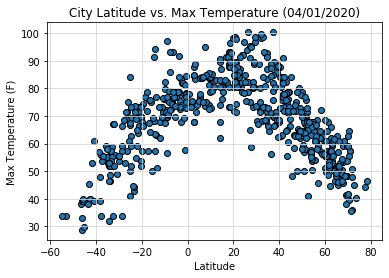

In [103]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.title("City Latitude vs. Max Temperature (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.savefig("figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

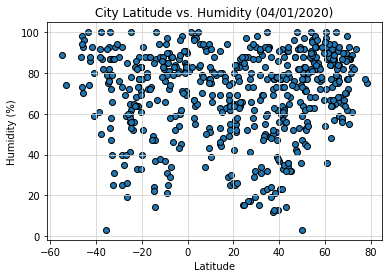

In [104]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.title("City Latitude vs. Humidity (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

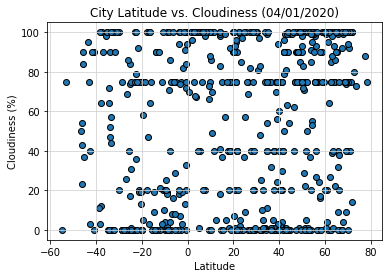

In [105]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.title("City Latitude vs. Cloudiness (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

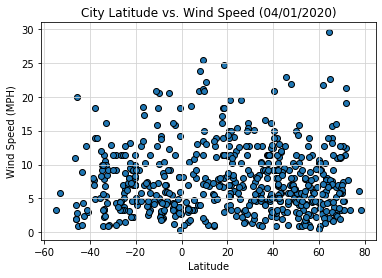

In [106]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

plt.title("City Latitude vs. Wind Speed (04/01/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.savefig("figures/fig4.png")
plt.show()

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [56]:
northern = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]

#northern.head()
#southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,port elizabeth,-33.92,25.57,46.40,87,47,3.36,ZA,1594927465
9,punta arenas,-53.15,-70.92,33.80,74,75,5.82,CL,1594927463
12,prudentopolis,-25.21,-50.98,66.63,65,74,3.80,BR,1594927582
13,bluff,-46.60,168.33,38.19,88,50,10.92,NZ,1594927254
15,ushuaia,-54.80,-68.30,33.80,89,0,3.36,AR,1594927456


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7899889397160014


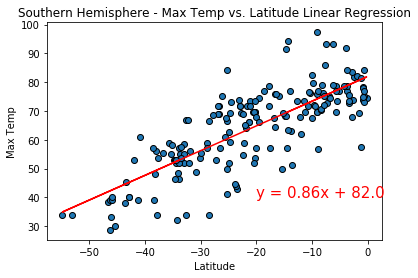

In [107]:
plt.scatter(southern["Lat"],southern["Max Temp"],edgecolors="black")


x = pd.to_numeric(southern['Lat']).astype(float)
y = pd.to_numeric(southern['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig5.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19463290291970275


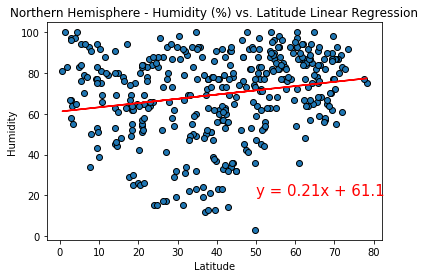

In [108]:
plt.scatter(northern["Lat"],northern["Humidity"],edgecolors="black")


x = pd.to_numeric(northern['Lat']).astype(float)
y = pd.to_numeric(northern['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig6.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.05707411108460653


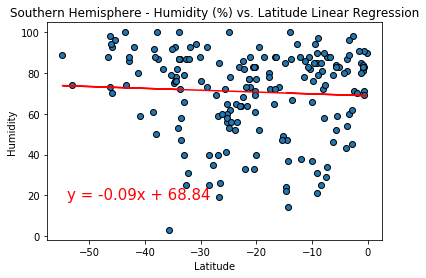

In [109]:
plt.scatter(southern["Lat"],southern["Humidity"],edgecolors="black")


x = pd.to_numeric(southern['Lat']).astype(float)
y = pd.to_numeric(southern['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-54,18),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig7.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.022453073887533505


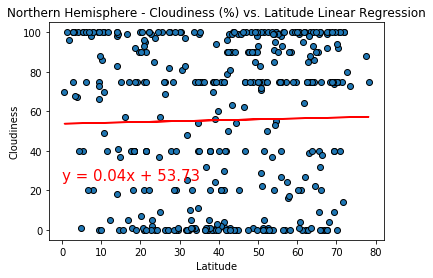

In [110]:
plt.scatter(northern["Lat"],northern["Cloudiness"],edgecolors="black")


x = pd.to_numeric(northern['Lat']).astype(float)
y = pd.to_numeric(northern['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,25),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig8.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.032346427499667395


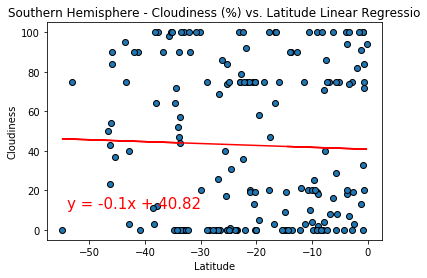

In [111]:
plt.scatter(southern["Lat"],southern["Cloudiness"],edgecolors="black")


x = pd.to_numeric(southern['Lat']).astype(float)
y = pd.to_numeric(southern['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-54,11),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig9.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1396346504795127


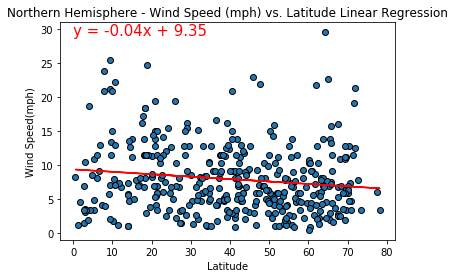

In [112]:
plt.scatter(northern["Lat"],northern["Wind Speed"],edgecolors="black")


x = pd.to_numeric(northern['Lat']).astype(float)
y = pd.to_numeric(northern['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,29),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig10.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03749628534575659


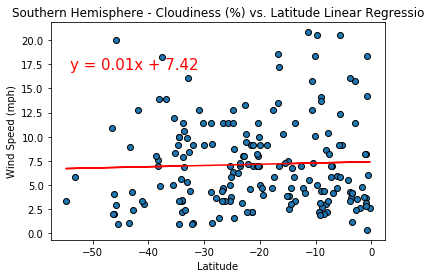

In [113]:
plt.scatter(southern["Lat"],southern["Wind Speed"],edgecolors="black")


x = pd.to_numeric(southern['Lat']).astype(float)
y = pd.to_numeric(southern['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-54,17),fontsize=15,color="red")

plt.plot(x,regress,"r-")

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regressio")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f'The r-squared is: {rvalue}')

plt.savefig("figures/fig11.png")
plt.show()